# Mnist dataset 

doing the handwritten digits recognition with the mnist dataset 

#baseline 


doing the image recognition for `3 and 7`

In [ ]:
# !pip install fastbook 

from fastai import * 
from fastai.vision.all import *
from fastbook import *

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
Path.BASE_PATH = path 
path

Path('.')

In [ ]:
path.ls() # shows the what's in the path 

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [ ]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()

In [ ]:
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [ ]:
np.array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
tensor(im3)[4:10,4:10] # pytorch version of the same array 

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [ ]:
# pytorch tensors have the GPU provides the computation advantage 


In [ ]:
# grabbing the tensor 3 and converting to the pandas dataframe 
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,5:22])
df.style.set_properties(**{'font-size' : '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [ ]:
# making the lists of all of the 7's 

seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

len(three_tensors), len(seven_tensors)

(6131, 6265)

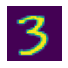

In [ ]:
show_image(three_tensors[1])

In [ ]:
three_tensors[1].shape

torch.Size([28, 28])

In [ ]:
type(three_tensors)

list

In [ ]:
# converting the list of iamges ( which are 3 and 7 ) into tensors 
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [ ]:
# rank is the number of dimensions or shape of the tensor 


In [ ]:
# stacked_threes.mean()  # average pixel of the whole cube 
# stacked_threes.mean(0) # average pixel across the 0th axis  

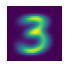

In [ ]:
show_image(stacked_threes.mean(0))

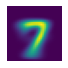

In [ ]:
show_image(stacked_sevens.mean(0))

In [ ]:
dist_3_abs = (stacked_threes[1] - stacked_threes.mean(0)).abs().mean()
dist_3_sqr = ((stacked_threes[1]-stacked_threes.mean(0))**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [ ]:
dist_7_abs = (stacked_threes[1] - stacked_sevens.mean(0)).abs().mean()
dist_7_sqr = ((stacked_threes[1]-stacked_threes.mean(0))**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.2021))

as we see above the absolute and squared error is less with three so we can conclude that the stacked image is of 3 and it's relatively greater for 7_abs and 7_sqr

In [ ]:
# for finding the type of tensor in fast ai is quite different than that of the type of tensors in the python 
# in python it's like type(tensor) but in fast ai it's like tensor.type()
dist_7_abs.type()

'torch.FloatTensor'

In [ ]:
# checking how our model is performing on the validation data 
# 1.st loading the data 
valid_3_tens  = torch.stack([tensor(Image.open(o)) for o in (path/'valid/3').ls()])
valid_3_tens = valid_3_tens.float()/255.

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid/7').ls()])
valid_7_tens = valid_7_tens.float()/255.
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

In [ ]:
valid_3_dist = mnist_distance(valid_3_tens,stacked_threes.mean(0))

In [ ]:
valid_3_dist, valid_3_dist.shape

(tensor([0.1605, 0.1378, 0.1327,  ..., 0.1277, 0.1580, 0.1417]),
 torch.Size([1010]))

In [ ]:
def is_3(x): return mnist_distance(x,stacked_threes.mean(0)) < mnist_distance(x,stacked_sevens.mean(0))

In [ ]:
is_3(valid_3_tens[4])

tensor(False)

In [ ]:
is_3(valid_7_tens[5]).float()

tensor(0.)

In [ ]:
is_3(valid_3_tens)

tensor([False,  True, False,  ...,  True, False,  True])

In [ ]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [ ]:
# here we've model of the 95% accuracy 

# working with the gradients 

1. initialize the random gradients 
2. for each image , use these weights to predict wheather it appers to be a three or seven 
3. Based on these predictions , calculate how good the model is ( it's loss ) 
4. calculate the gradient, which measures for each weiight how changing the weight would change the loss 
5. step , all weights based on the calculations 
6. repeat whole process from 2nd step 
7. do it until you are satisfied by the results 

## init ----> predict ------> loss ---> gradient ---> step repeat ------> stop 

In [ ]:
# loss will be small when the performance of the model is good 


In [ ]:
def f(x) : return x**2

In [ ]:
# plot_function(f,'x','x**2') # 1st parar is the function name itself 2nd is the x label and 3rd is the y label 

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


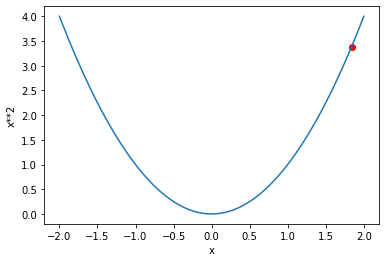

In [ ]:
# here we are trying to find the lowest point in the loss fun  f 
plot_function(f,'x','x**2')
value = 1.84 #@param {type:"slider", min:-2, max:2, step:0.01}
plt.scatter(value,f(value),color = 'red') 

In [ ]:
# WE for modifying the funcion later and to tell pytorch to remember that you have to do this some derivative and calculationns later 
xt = tensor(3.).requires_grad_() # underscroll at the end of function in pytorch means in place modification it modifies the value which you are gonna pass 

In [ ]:
# it keeps track of all the computitions we do in order to calculate derivative later 
yt = f(xt)
yt # here you have noticed that tensor gives the grad_fn also so we can give the derivative out here by using backward() method 

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
yt.backward() # for telling pytorch to calculate the derivative 

In [ ]:
xt.grad # getting result from dertivative function where we have declared requires_grad 

tensor(6.)

# working with the gradients 

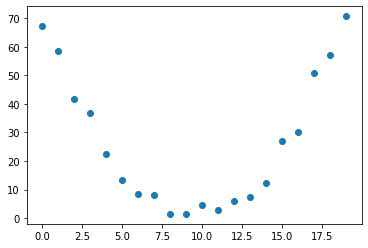

In [144]:
time = torch.arange(0,20).float(); time
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

plt.scatter(time,speed)
def f(t,params): 
  a,b,c = params 
  return a*(t**2) + (b*t) + c 
  

In [145]:

def mse(preds,targets):return ((preds-targets) ** 2).mean().sqrt()


In [146]:

params = torch.randn(3).requires_grad_()
orig_params = params.clone()
preds = f(time,params)


In [147]:
def show_preds(preds,ax = None):
  if ax is None : ax = plt.subplots()[1]
  ax.scatter(time,speed)
  ax.scatter(time,to_np(preds),color = 'red')
  ax.set_ylim(-300,1000)


tensor(107.7157, grad_fn=<SqrtBackward>)

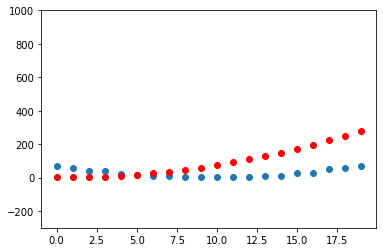

In [148]:
show_preds(preds)
loss = mse(preds,speed)
loss 
loss.backward()
params.grad
params.grad * 1e-5
params 
lr = 1e-5 
params.data -= lr * params.grad.data
params.grad = None
preds = f(time,params)
mse(preds,speed)


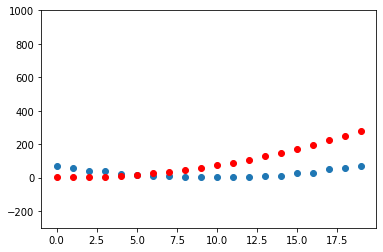

In [149]:
show_preds(preds)


In [150]:
def apply_step(params, prn = True):
    preds = f(time,params)
    loss = mse(preds,speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds
for i in range(10): apply_step(params)

107.7157211303711
107.4485855102539
107.18152618408203
106.91454315185547
106.64763641357422
106.38081359863281
106.11406707763672
105.847412109375
105.58081817626953
105.31431579589844


if we wanted to find the minima of the gradients or functions we will have to define the speed at which we are gonna take a step and set the learning rate 

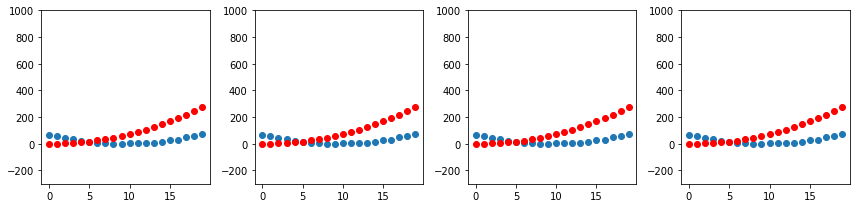

In [151]:
_, axs = plt.subplots(1,4,figsize = (12,3))
for ax in axs : show_preds(apply_step(params,False),ax)
plt.tight_layout()

# MNIST loss function 

In [152]:
# we've to calculate the gradient where the difference is really small 

In [ ]:
# if we change the param for small amount then there will be no change in the accuracy of the